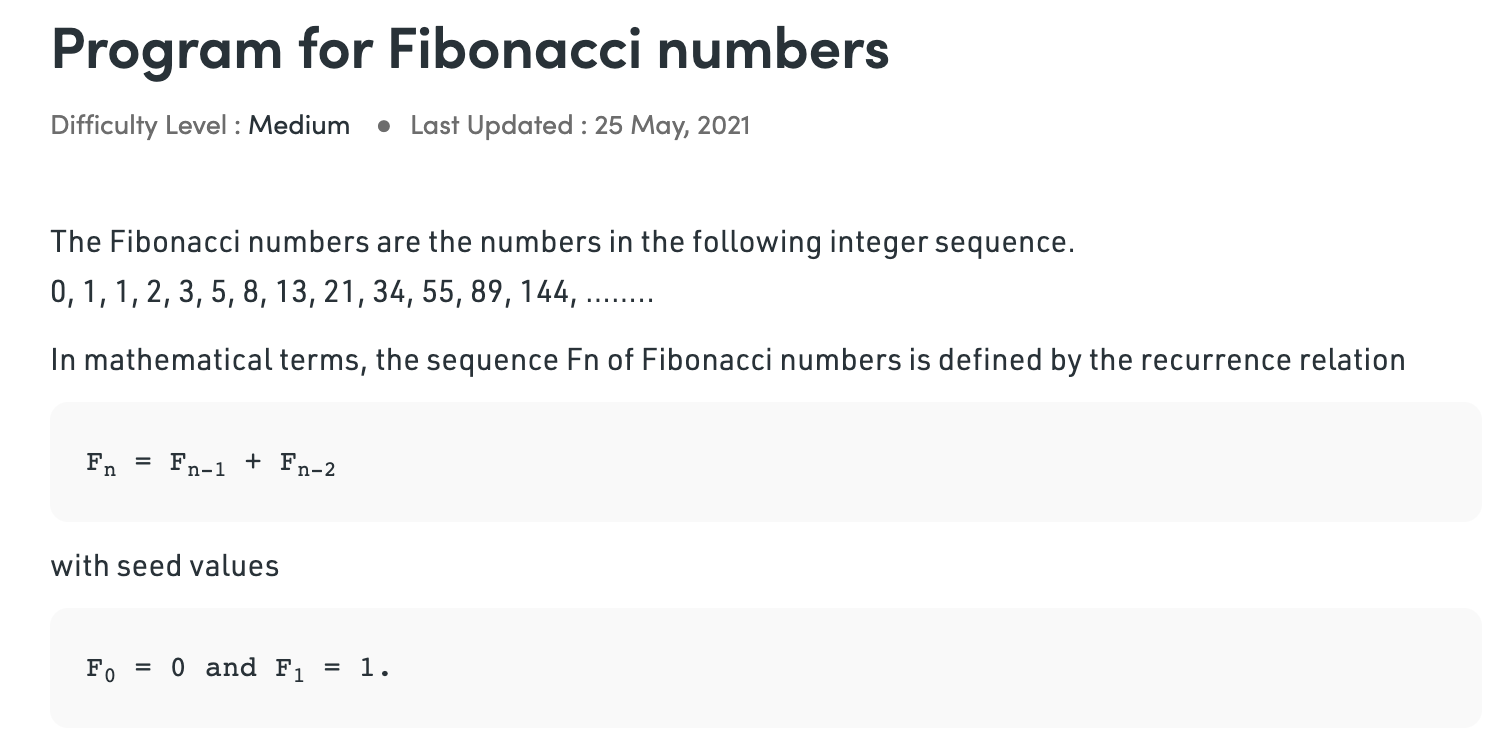

            Lets first solve it recursively 

In [147]:
def nFibonacci(n):
    
    if n == 1 or n ==2 :
        return 1
    
    return nFibonacci(n-1)+nFibonacci(n-2)

In [148]:
n = int(input())
ans = nFibonacci(n)
print(ans)

7
13


In [149]:
### Lets do memoization on top of that so that its much much faster

In [150]:
def nFibonacciMem(n,mem):
    
    if n == 1 or n == 2:
        return 1
    
    if mem[n-1] == -1 :
        ans1 = nFibonacciMem(n-1,mem)
        mem[n-1] = ans1
    else:
        ans1 = mem[n-1]
        
    if mem[n-2] == -1 :
        ans2 = nFibonacciMem(n-2,mem)
        mem[n-2] = ans1
    else:
        ans2 = mem[n-2]
        
    return ans1+ans2

In [151]:
n = int(input())
mem = [-1 for i in range(n+1)]
ans = nFibonacciMem(n,mem)
print(ans)

7
13


    lets write the same code recursively in a much cleaner way  to reove the burden of maintaining a recursive Call Stack.

In [152]:
def nFibonacciI(n):
    
    if n <= 0 :
        return "Invalid Input"
    
    mem = [-1 for i in range(n+1)]
    mem[1],mem[2] = 1,1
    
    for i in range(3,n+1):
        mem[i] = mem[i-1] + mem[i-2]
        
    return mem[n]

In [153]:
n = int(input())
ans = nFibonacciI(n)
print(ans)

7
13


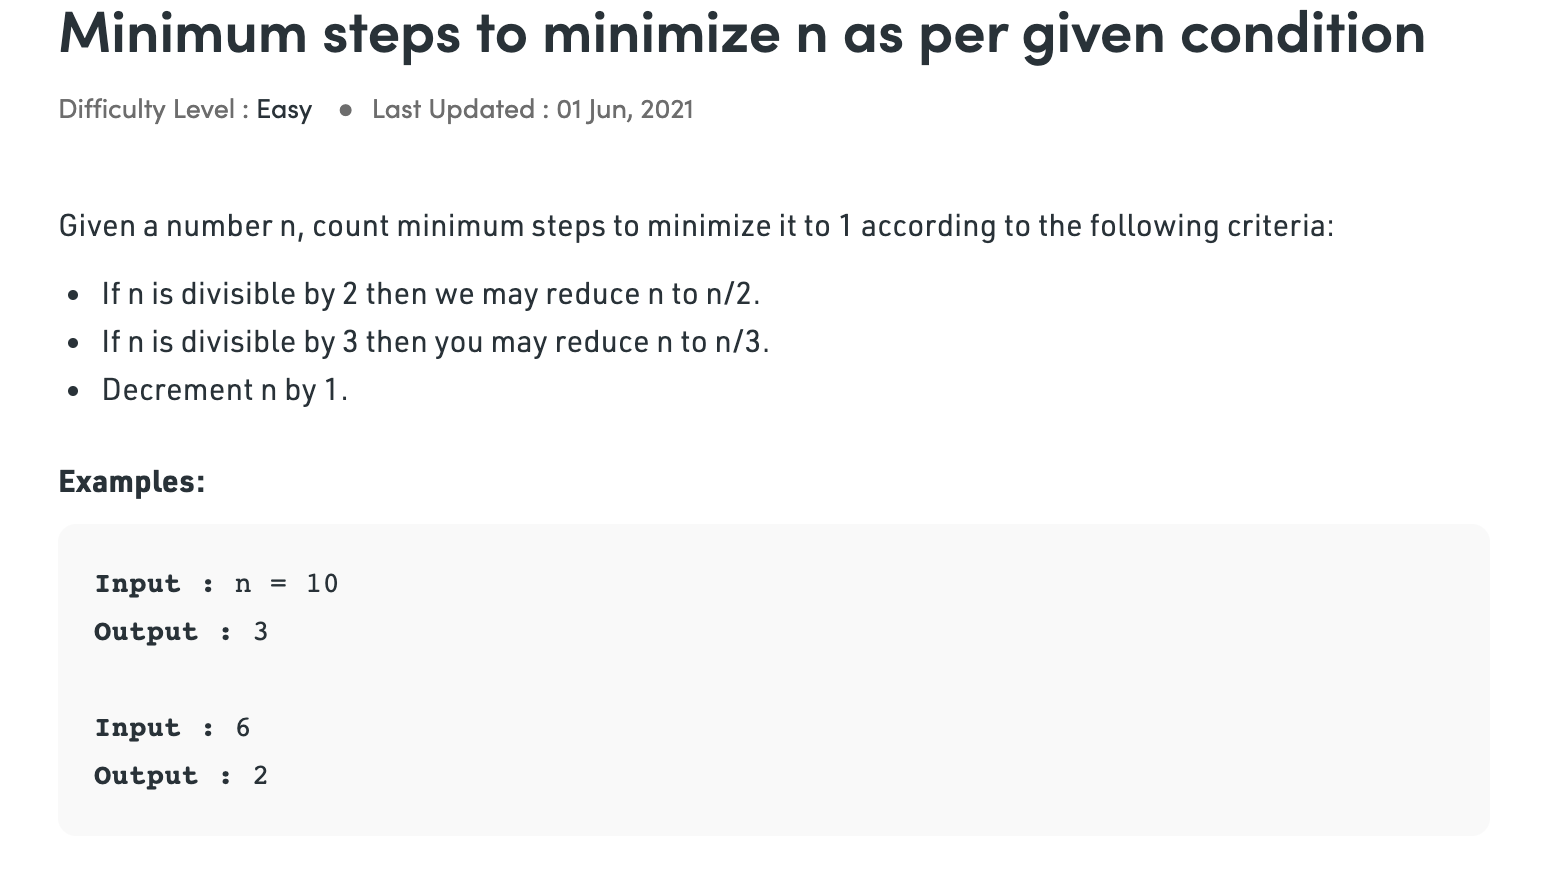

    lets solve it recursively 

In [154]:
import sys

def mintoOne(n):
    if n == 1:
        return 0
    
    noStep_1,noStep_2,noStep_3 = sys.maxsize,sys.maxsize,sys.maxsize

    noStep_1 = 1 + mintoOne(n-1)
    
    if n%3 == 0:
        noStep_3 = 1 + mintoOne(n//3)
    
    if n%2 == 0:
        noStep_2 = 1 + mintoOne(n//2)
        
    return min(noStep_1,noStep_2,noStep_3)

In [155]:
print(mintoOne(5))
print(mintoOne(10))
print(mintoOne(20))

3
3
4


In [156]:
print(mintoOne(300))

8


In [157]:
import sys

def mintoOne(n,mem):
    
    if n == 1:
        return 0
    
    noStep_1,noStep_2,noStep_3 = sys.maxsize,sys.maxsize,sys.maxsize

    if mem[n-1] == -1:
        noStep_1 = mintoOne(n-1,mem)
        mem[n-1] = noStep_1
    else:
        noStep_1 = mem[n-1]
    
    if n%2 == 0:
        if mem[n//2] == -1:
            noStep_2 = mintoOne(n//2,mem)
            mem[n//2] = noStep_2
        else:
            noStep_2 = mem[n//2]
    
    if n%3 == 0:
        if mem[n//3] == -1:
            noStep_3 = mintoOne(n//3,mem)
            mem[n//3] = noStep_3
        else:
            noStep_3 = mem[n//3]
        
    return 1 + min(noStep_1,noStep_2,noStep_3)

In [158]:
n = int(input())
mem = [-1 for i in range(n+1)]
ans = mintoOne(n,mem)
print(ans)

300
8


           Now this is much much faster !!!!

     lets write the same code recursively in a much cleaner way  to reove the burden of maintaining a recursive Call Stack.

In [159]:
def mintoOneI(n):
    
    if n <= 0 :
        return "Invalid Input"
    
    mem = [-1 for i in range(n+1)]
    mem[1] = 0
    
    for i in range(2,n+1):
        
        smallanswer1,smallanswer2,smallanswer3 = sys.maxsize,sys.maxsize,sys.maxsize
        
        smallanswer1 = mem[i-1]
        
        if i%2==0:
            smallanswer2 = mem[i//2]
        
        if i%3==0:
            smallanswer3 = mem[i//3]
        
        mem[i] = 1 + min(smallanswer1,smallanswer2,smallanswer3)
    
    
    return mem[n]

In [160]:
n = int(input())
ans = mintoOneI(n)
print(ans)

300
8


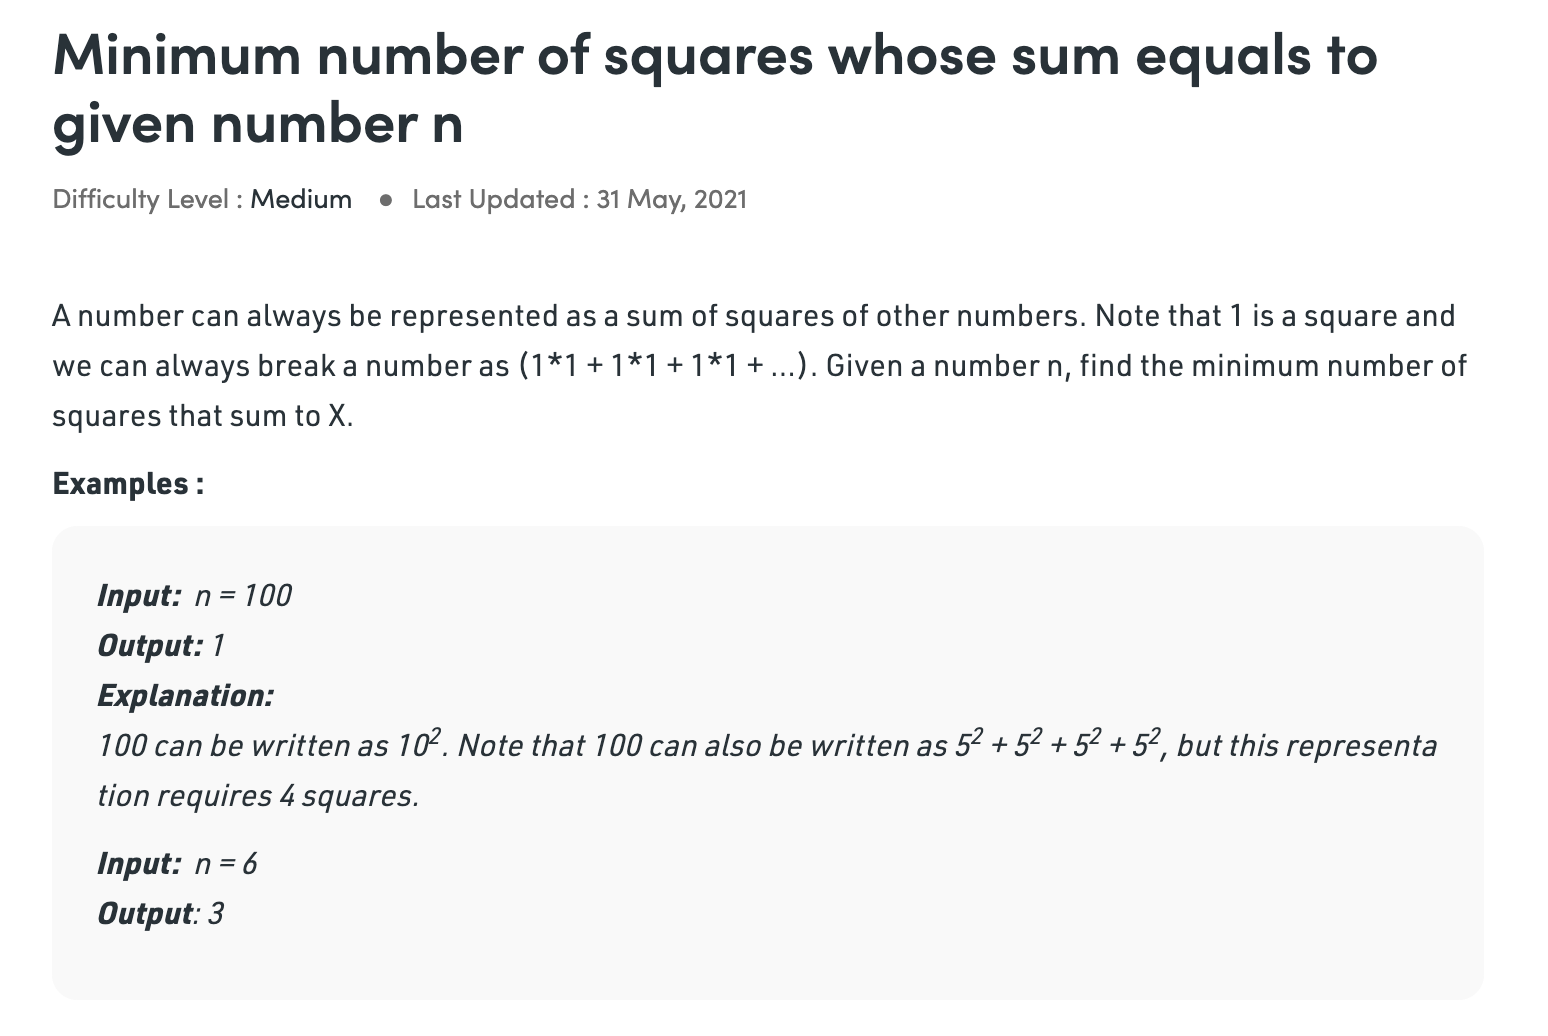

     Lets try it recursively first 

In [161]:
import math

def minNoOfSquaresSum(n):
    
    if n == 0:
        return 0
    
    minCount = sys.maxsize
    maxSubNum = int(math.sqrt(n))
    
    for i in range(1,maxSubNum+1):
        newNum = n - (i**2)
        tempCount = minNoOfSquaresSum(newNum)
        if tempCount < minCount:
            minCount = tempCount
    
    return 1+ minCount   

In [121]:
n = int(input())
ans = minNoOfSquaresSum(n)
print(ans)

10
2


In [182]:
# Same code using While Loop :

In [191]:
import math 

def minNoOfSquaresSum(num):
    
    if num==0:
        return 0
    
    #time to loop from i till value of i for which number - i*i > 0
    
    minSteps = sys.maxsize
    i = 1
    while num-i**2 >= 0:
        newNum = num-i**2
        tempsteps = 1 + minNoOfSquaresSum(newNum)
        if tempsteps < minSteps:
            minSteps = tempsteps
        i += 1
    return minSteps

In [192]:
x = minNoOfSquaresSum(10)
print(x)

2


In [209]:
x = minNoOfSquaresSum(43)
print(x)

3


In [210]:
## just note n = 43 takes so much time ...

In [211]:
# lets now use memoization : 

In [199]:
import math 

def minNoOfSquaresSumMem(num,dp):
    
    if num==0:
        return 0
    
    ## Time to loop from i till value of i for which number - i*i > 0
    
    minSteps = sys.maxsize
    i = 1
    while num-i**2 >= 0:
        newNum = num-i**2

        if dp[newNum] == -1:
            tempsteps = 1 + minNoOfSquaresSumMem(newNum,dp)
            dp[newNum] = tempsteps
        else:
            tempsteps = dp[newNum]
        
        if tempsteps < minSteps:
            minSteps = tempsteps
            
        i += 1
    return minSteps

In [208]:
n = int(input())
dp = [-1 for i in range(n+1)]
x = minNoOfSquaresSumMem(n,dp)
print(x)

43
3


In [212]:
## much much faster for n = 43 

In [213]:
## lets do it iteratively in bottom up approach :

In [253]:
from math import ceil,sqrt

def minStepsdpBU(n,dp):
    
    for num in range(4,n+1):
        maxValue = int(math.sqrt(num))
#         print("Max Val : ",maxValue)
        for i in range(1,maxValue+1):
            dp[num] = min(1+dp[num-i**2],dp[num])

    return dp[n]

In [260]:
n = int(input())
dp = [0,1,2,3]
for i in range(4,n+1):
    dp.append(sys.maxsize)

x = minStepsdpBU(n,dp)
print(dp)
print(x)

6
[0, 1, 2, 3, 1, 2, 3]
3


In [259]:
numbers = [0,1,2,3,4,5,6,7,8,9,10]

for num in numbers:
    dp = [0,1,2,3]
    for i in range(4,num+1):
        dp.append(sys.maxsize)
    x = minStepsdpBU(num,dp)
    print("Num : ",num, "Min no Of Squares : ",x)

Num :  0 Min no Of Squares :  0
Num :  1 Min no Of Squares :  1
Num :  2 Min no Of Squares :  2
Num :  3 Min no Of Squares :  3
Num :  4 Min no Of Squares :  1
Num :  5 Min no Of Squares :  2
Num :  6 Min no Of Squares :  3
Num :  7 Min no Of Squares :  4
Num :  8 Min no Of Squares :  2
Num :  9 Min no Of Squares :  1
Num :  10 Min no Of Squares :  2


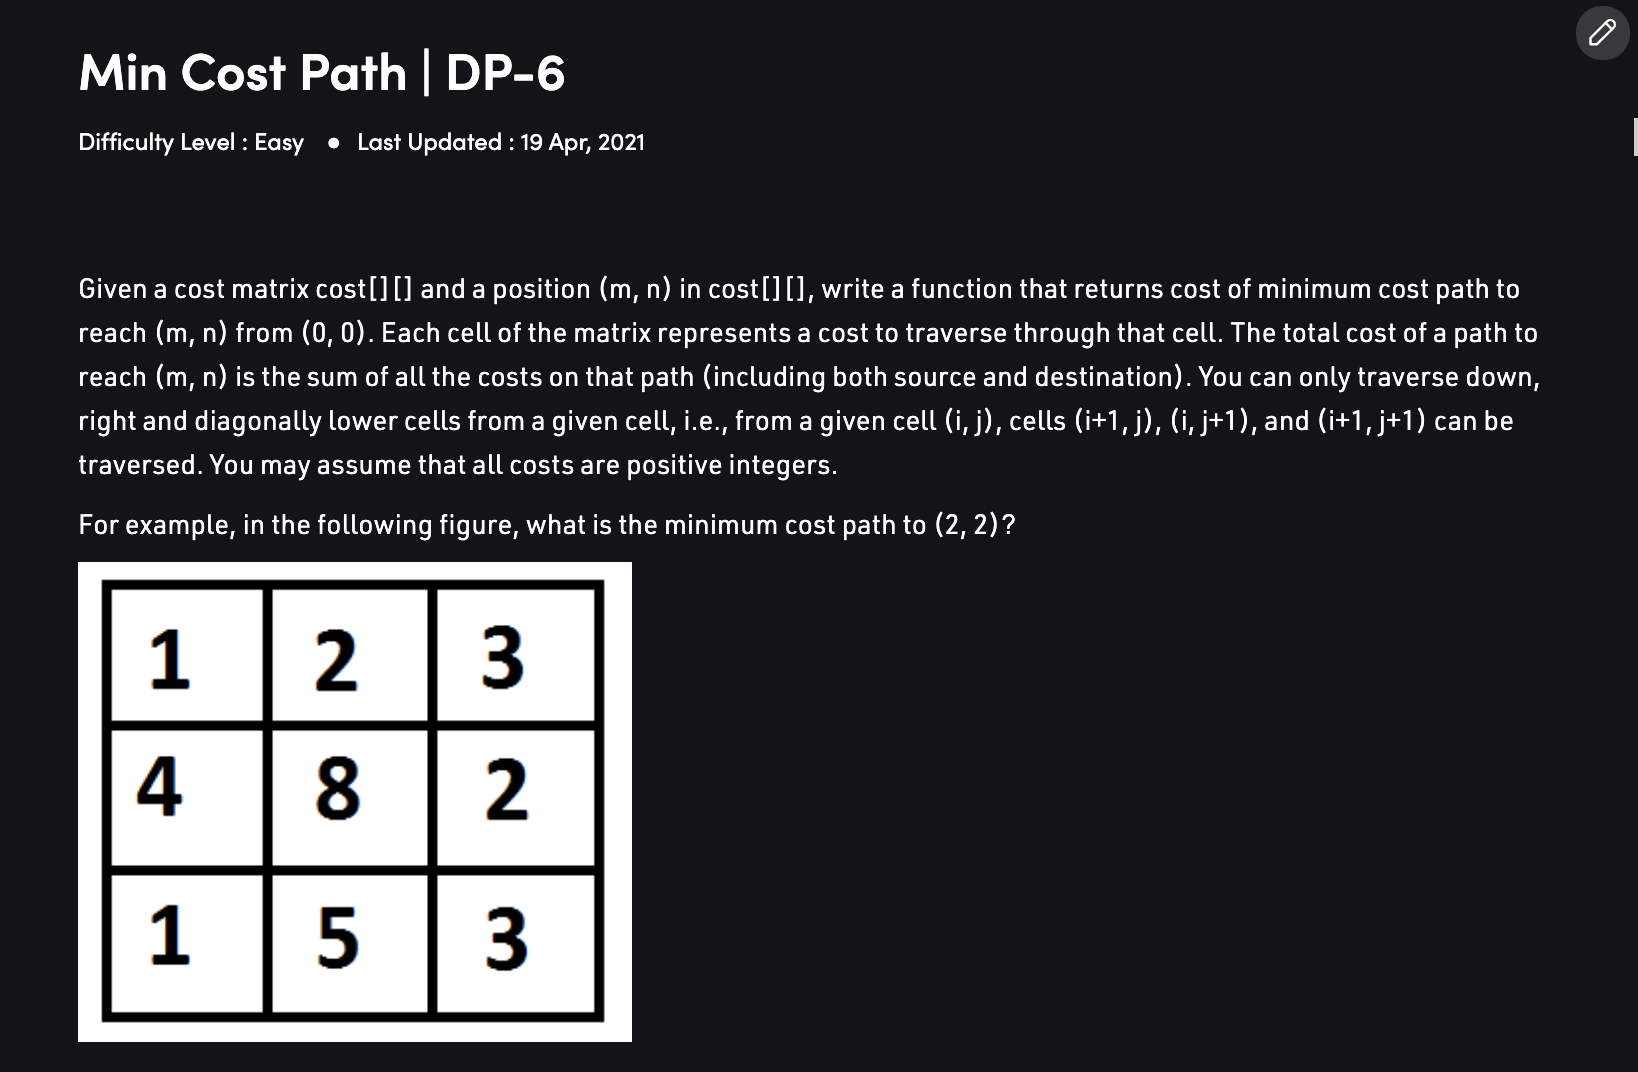

In [93]:
import sys

def minCostPath(cost,i,j,m,n):
    
    if i>m or j>n:
        return sys.maxsize
    
    if i==m and j ==n :
        return cost[i][j]
    
    #right_path
    rightPathCost = minCostPath(cost,i,j+1,m,n)
    
    #path_down
    downPathCost = minCostPath(cost,i+1,j,m,n)
    
    #diagonalPath
    diagonalPathCost = minCostPath(cost,i+1,j+1,m,n)
    
    minCost = min(rightPathCost,downPathCost,diagonalPathCost)
    
    totalCost = cost[i][j] + minCost
    
    
    return totalCost
    

In [94]:
cost = [[1,2,3],[4,8,2],[1,5,3]]
m = len(cost)
n = len(cost[0])
x = minCostPath(cost,0,0,m-1,n-1)
print(x)

8


In [95]:
cost = [[1,5,11],[8,13,12],[2,3,7],[15,16,18]]
m = len(cost)
n = len(cost[0])
x = minCostPath(cost,0,0,m-1,n-1)
print(x)

30


In [96]:
import sys

def minCostPathMem(cost,dp,i,j,m,n):
    
    if i>m or j>n:
        return sys.maxsize
    
    if i==m and j ==n :
        return cost[i][j]
    
    #right_path
    
    if dp[i][j+1] == sys.maxsize:
        rightPathCost = minCostPathMem(cost,dp,i,j+1,m,n)
        dp[i][j+1] = rightPathCost
    else:
        rightPathCost = dp[i][j+1]
    
    #path_down
    if dp[i+1][j] == sys.maxsize:
        downPathCost = minCostPathMem(cost,dp,i+1,j,m,n)
        dp[i+1][j] = downPathCost
    else:
        downPathCost = dp[i+1][j]
    
    
    #diagonalPath
    if dp[i+1][j+1] == sys.maxsize:
        diagonalPathCost = minCostPathMem(cost,dp,i+1,j+1,m,n)
        dp[i+1][j+1] = diagonalPathCost
    else:
        diagonalPathCost = dp[i+1][j+1]
    
    minCost = min(rightPathCost,downPathCost,diagonalPathCost)
    
    dp[i][j] = cost[i][j] + minCost
    
    
    return dp[i][j]
    

In [97]:
cost = [[1,5,11],[8,13,12],[2,3,7],[15,16,18]]
m = len(cost)
n = len(cost[0])
dp = [[sys.maxsize for j in range(n+1)] for i in range(m+1)]
# print(dp)
x = minCostPathMem(cost,dp,0,0,m-1,n-1)
# print(dp)
print(x)

30


In [98]:
cost = [[1,2,3],[4,8,2],[1,5,3]]
m = len(cost)
n = len(cost[0])
dp = [[sys.maxsize for j in range(n+1)] for i in range(m+1)]
# print(dp)
x = minCostPathMem(cost,dp,0,0,m-1,n-1)
# print(dp)
print(x)

8


In [99]:
def minCostPathBU(cost,dp,i,j,m,n):
    
    for i in range(m,-1,-1):
        for j in range(n,-1,-1):
            if i==m and j == n:
                dp[i][j] = cost[m][n]
            else:
                #min of down cell, right cell, diagonal cell values
                dp[i][j] = cost[i][j] + min(dp[i][j+1],dp[i+1][j],dp[i+1][j+1])
            
    return dp[0][0]

In [100]:
cost = [[1,2,3],[4,8,2],[1,5,3]]
m = len(cost)
n = len(cost[0])
dp = [[sys.maxsize for j in range(n+1)] for i in range(m+1)]
# print(dp)
x = minCostPathBU(cost,dp,0,0,m-1,n-1)
# print(dp)
print(x)

8


In [105]:
cost = [[1,5,11],[8,13,12],[2,3,7],[15,16,18]]
m = len(cost)
n = len(cost[0])
dp = [[sys.maxsize for j in range(n+1)] for i in range(m+1)]
# print(dp)
x = minCostPathBU(cost,dp,0,0,m-1,n-1)
# print(dp)
print(x)

30


In [101]:
def minCostPathTD(cost,dp,i,j,m,n):
    
    for i in range(1,m+1):
        for j in range(1,n+1):
            if i==1 and j == 1:
                dp[i][j] = cost[i-1][j-1]
            else:
                #min of down cell, right cell, diagonal cell values
                dp[i][j] = cost[i-1][j-1] + min(dp[i-1][j],dp[i][j-1],dp[i-1][j-1])
            
    return dp[m][n]

In [102]:
cost = [[1,2,3],[4,8,2],[1,5,3]]
m = len(cost)
n = len(cost[0])
dp = [[sys.maxsize for j in range(n+1)] for i in range(m+1)]
# print(dp)
x = minCostPathTD(cost,dp,0,0,m,n)
# print(dp)
print(x)

8


In [104]:
cost = [[1,5,11],[8,13,12],[2,3,7],[15,16,18]]
m = len(cost)
n = len(cost[0])
dp = [[sys.maxsize for j in range(n+1)] for i in range(m+1)]
# print(dp)
x = minCostPathTD(cost,dp,0,0,m,n)
# print(dp)
print(x)

30


### Longest Common SubSequence 

In [110]:
def lcs(st1,st2,i,j):
    
    if i>=len(st1) or j>=len(st2):
        return 0
    
    if st1[i]==st2[j]:
        lcsl = 1 + lcs(st1,st2,i+1,j+1)
    else:
        lcsl = max(lcs(st1,st2,i+1,j),lcs(st1,st2,i,j+1))
    
    return lcsl

In [111]:
str1 = 'AGGTAB'
str2 = 'GXTXAYB'

print(lcs(str1,str2,0,0))

4


In [192]:
def lcsMem(st1,st2,dp,i,j):
    
    if i >= len(st1) or j >= len(st2):
        return 0
    
    lcsl = -1
    
    if st1[i] == st2[j]:
        if dp[i+1][j+1]==-1:
            dp[i+1][j+1] = lcsMem(st1,st2,dp,i+1,j+1)
        
        dp[i][j] = 1 + dp[i+1][j+1]
        lcsl = dp[i][j]
    else:
        
        if dp[i+1][j] == -1:
            dp[i+1][j] = lcsMem(st1,st2,dp,i+1,j) 
        
        lcsl_1 = dp[i+1][j]
        
        if dp[i][j+1] == -1:
            dp[i][j+1] = lcsMem(st1,st2,dp,i,j+1)
        
        lcsl_2 = dp[i][j+1]
        
        lcsl = max(lcsl_1,lcsl_2)
    
    dp[i][j] = lcsl
    
    return dp[i][j]

In [193]:
str1 = 'gdc'
str2 = 'gkc'
m = len(str1) #no of rows
n = len(str2)  # no of columns
dp = [[-1 for i in range(n+1)] for j in range(m+1)]
print(dp)
x = lcsMem(str1,str2,dp,0,0)
print(dp)
print(x)

[[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1]]
[[2, -1, -1, -1], [-1, 1, 1, 0], [-1, 1, 1, -1], [-1, 0, -1, 0]]
2


In [194]:
str1 = 'AGGTAB'
str2 = 'GXTXAYB'
m = len(str1) #no of rows
n = len(str2)  # no of columns
dp = [[-1 for i in range(n+1)] for j in range(m+1)]
x = lcsMem(str1,str2,dp,0,0)
print(dp)
print(x)

[[4, 3, 3, 2, 2, -1, -1, -1], [4, 3, 3, 2, 2, 1, 1, 0], [-1, 3, 3, 2, 2, 1, 1, 0], [-1, 3, 3, 2, 2, 1, 1, 0], [-1, 2, 2, 2, 2, 1, 1, 0], [-1, 1, 1, 1, 1, 1, 1, -1], [-1, 0, 0, 0, 0, 0, -1, 0]]
4


In [195]:
str1 = 'abedgjc'
str2 = 'bmdgsc'
m = len(str1) #no of rows
n = len(str2)  # no of columns
dp = [[-1 for i in range(n+1)] for j in range(m+1)]
x = lcsMem(str1,str2,dp,0,0)
print(dp)
print(x)

[[4, 3, 3, 2, 1, 1, 0], [4, 3, 3, 2, 1, 1, 0], [-1, 3, 3, 2, 1, 1, 0], [-1, 3, 3, 2, 1, 1, 0], [-1, 2, 2, 2, 1, 1, 0], [-1, 1, 1, 1, 1, 1, 0], [-1, 1, 1, 1, 1, 1, -1], [-1, 0, 0, 0, 0, -1, 0]]
4


In [204]:
def lcsBU(st1,st2):
    m = len(st1)
    n = len(st2)
    dp = [[0 for i in range(n+1)] for j in range(m+1)]
    
    for i in range(m-1,-1,-1):
        for j in range(n-1,-1,-1):
            if st1[i]==st2[j]:
                dp[i][j] = 1 + dp[i+1][j+1]
            else:
                dp[i][j] = max(dp[i+1][j],dp[i][j+1])
    return dp[0][0]

In [205]:
str1 = 'abedgjc'
str2 = 'bmdgsc'
x = lcsBU(str1,str2)
# print(dp)
print(x)

4


In [206]:
str1 = 'AGGTAB'
str2 = 'GXTXAYB'
x = lcsBU(str1,str2)
# print(dp)
print(x)

4


In [208]:
str1 = 'gdc'
str2 = 'gkc'
x = lcsBU(str1,str2)
# print(dp)
print(x)

2


### 0-1 KnapSack Problem 

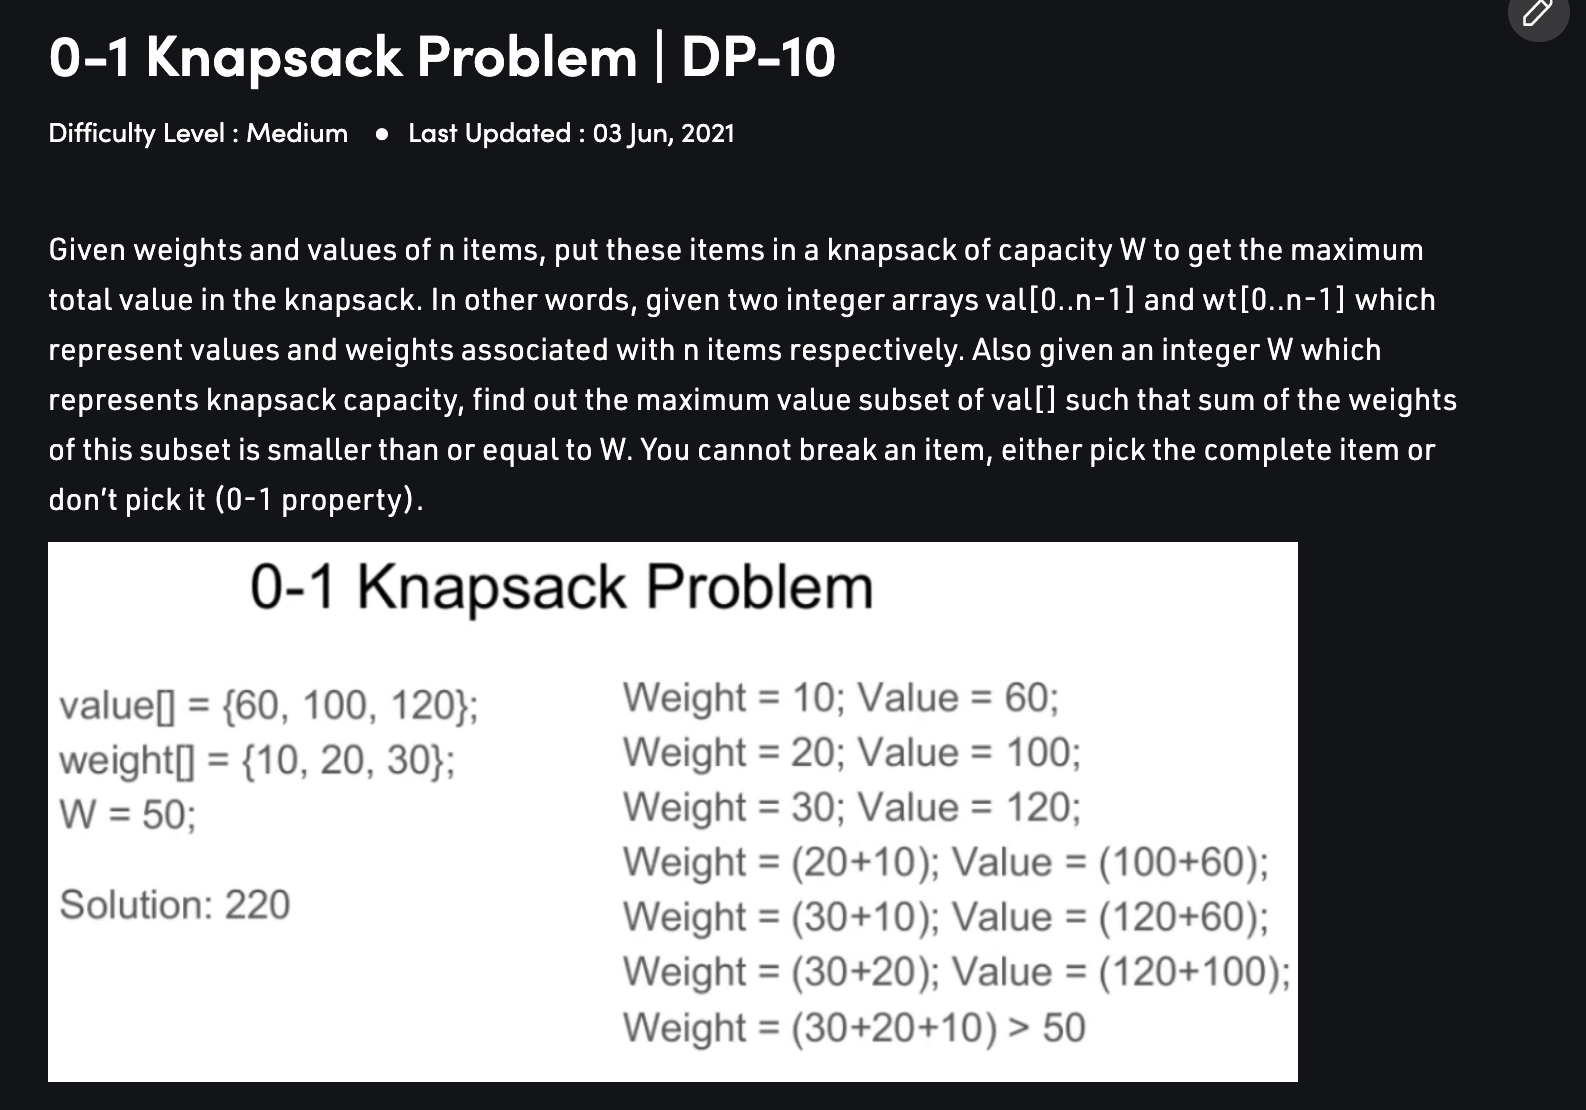

In [4]:
def knapsack(wt,val,W,n,i):
    
    if i >= n:
        return 0
        
    if wt[i] > W :
        tempval = knapsack(wt,val,W,n,i+1)
    
    else:
        #include ith element
        included_val = val[i] + knapsack(wt,val,W-wt[i],n,i+1) 
        
        #skip ith element
        excluded_val = knapsack(wt,val,W,n,i+1)
        
        tempval = max(included_val,excluded_val)
        
    return tempval

In [9]:
wt =  [10,20,30]
val = [10,100,120]

W = 50
n = len(val)
x = knapsack(wt,val,W,n,0)
print(x)

220


In [10]:
### using memoization ----------------------------------------

In [ ]:
1. "wt" and "val" lists are fixed 
2. "W" is varying from W to 0 and decision maker in ith value inclusion or not 
3. "i" varies from 0 - (n-1)  where n  is length of value list

In [29]:
def knapsackMem(wt,val,W,n,i,dp):
    
    if i >= n:
        return 0
        
    if wt[i] > W :
        if dp[W][i+1] == -99:
            smallAns = knapsackMem(wt,val,W,n,i+1,dp)
            dp[W][i+1] = smallAns
            
        tempval = dp[W][i+1]
    
    else:
        #include ith element
        if dp[W-wt[i]][i+1] == -99:
            smallAns = knapsackMem(wt,val,W-wt[i],n,i+1,dp)
            dp[W-wt[i]][i+1] = smallAns
        
        included_val = val[i] + dp[W-wt[i]][i+1] 
        
        #skip ith element
        if dp[W][i+1] == -99:
            smallAns = knapsackMem(wt,val,W,n,i+1,dp)
            dp[W][i+1] = smallAns
            
        excluded_val = dp[W][i+1]
        
        tempval = max(included_val,excluded_val)
    
    dp[W][i] = tempval
        
    return dp[W][i]

In [32]:
wt =  [10,20,30]
val = [10,100,120]

W = 50
n = len(val)

dp = [[-99 for i in range(len(val)+1)] for j in range(W+1)]
# print(len(dp))
# print(len(dp[0]))

x = knapsackMem(wt,val,W,n,0,dp)

print(x)

220


In [39]:
wt =  [10,20,30]
val = [10,100,120]

def knapsackBU(wt,val,w):
    
    n = len(val) #number of items
    dp = [[0 for j in range(w+1)] for i in range(n+1)]
    
    for i in range(1,n+1):
        for j in range(1,w+1):
            
            if j < wt[i-1]:   #capacity is less than weight of ith item 
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = max( val[i-1]+dp[i-1][j-wt[i-1]] , dp[i-1][j] )
                
    return dp[n][w]

In [40]:
wt =  [10,20,30]
val = [10,100,120]
W = 50

x = knapsackBU(wt,val,W)
print(x)

220


### Matrix Multiplication Problem :